In [54]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from IPython.display import display, HTML
display(HTML(""))

In [64]:
# import
la = pd.read_csv("Prepared_data.csv", parse_dates=["start_time","end_time"], low_memory=False)

In [65]:
user = la["user_type"].unique()
print(user)

['Walk-up' 'Monthly Pass' 'Annual Pass' 'One Day Pass' 'Flex Pass'
 'Testing']


In [66]:
bikes = la['bike_id'].unique()
len(bikes)

3150

In [67]:
la.head()

,Unnamed: 0,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,duration
0,0,2019-01-01 00:07:00,2019-01-01 00:14:00,3046,3051,06468,Walk-up,2nd & Hill,7th & Broadway,7.0
1,1,2019-01-01 00:08:00,2019-01-01 00:14:00,3046,3051,12311,Walk-up,2nd & Hill,7th & Broadway,6.0
2,2,2019-01-01 00:18:00,2019-01-01 00:50:00,3030,3075,05992,Walk-up,Main & 1st,Broadway & 9th,32.0
3,3,2019-01-01 00:20:00,2019-01-01 00:50:00,3030,3075,05860,Walk-up,Main & 1st,Broadway & 9th,30.0
4,4,2019-01-01 00:22:00,2019-01-01 00:50:00,3030,3075,06006,Walk-up,Main & 1st,Broadway & 9th,28.0


# Usage during a day

## Classification:
- Morning: 6 a.m. - 10 a.m.
- Mid-morning: 10 a.m. - 12 p.m.
- Noon: 12 p.m - 2 p.m.
- Afternoon: 2 p.m. - 5 p.m.
- Evening: 5 p.m. - 9 p.m.
- Night: 9 p.m. - 6 a.m.

In [68]:
def get_weekday (ts):
    return ts.weekday()
def get_hour (ts):
    return ts.hour
def get_date (ts):
    return ts.date()
la["Date"] = la["start_time"].apply(lambda x: get_date (x))
la["Weekday"] = la["start_time"].apply(lambda x: get_weekday (x))
la["Hour"] = la["start_time"].apply(lambda x: get_hour (x))
la['Month'] = la["start_time"].apply(lambda x: x.month)
la.head(3)

,Unnamed: 0,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,duration,Date,Weekday,Hour,Month
0,0,2019-01-01 00:07:00,2019-01-01 00:14:00,3046,3051,06468,Walk-up,2nd & Hill,7th & Broadway,7.0,2019-01-01,1,0,1
1,1,2019-01-01 00:08:00,2019-01-01 00:14:00,3046,3051,12311,Walk-up,2nd & Hill,7th & Broadway,6.0,2019-01-01,1,0,1
2,2,2019-01-01 00:18:00,2019-01-01 00:50:00,3030,3075,05992,Walk-up,Main & 1st,Broadway & 9th,32.0,2019-01-01,1,0,1


In [78]:
morning_start = la[(la['Hour']>=6) & (la['Hour']<10)]
mid_morning_start = la[(la['Hour']>=10) & (la['Hour']<12)]
noon_start = la[(la['Hour']>=12) & (la['Hour']<14)]
afternoon_start = la[(la['Hour']>=14) & (la['Hour']<17)]
evening_start = la[(la['Hour']>=17) & (la['Hour']<21)]
night_start = la[((la['Hour']>=21) & (la['Hour']<24)) | ((la['Hour']>=0) & (la['Hour']<6))]

In [80]:
print(la['start_time'].size)
print(morning_start['Hour'].size + mid_morning_start['Hour'].size + noon_start['Hour'].size + afternoon_start['Hour'].size + evening_start['Hour'].size + night_start['Hour'].size)

290342
290342


In [115]:
start_hours = pd.DataFrame({'Time_Period': ['Morning', 'Mid-morning', 'Noon', 'Afternoon', 'Evening', 'Night'], 'Rides': [morning_start['Hour'].size, mid_morning_start['Hour'].size, noon_start['Hour'].size,afternoon_start['Hour'].size, evening_start['Hour'].size, night_start['Hour'].size]})


In [116]:
start_hours.head()


,Time_Period,Rides
0,Morning,48227
1,Mid-morning,30195
2,Noon,40514
3,Afternoon,62662
4,Evening,79443


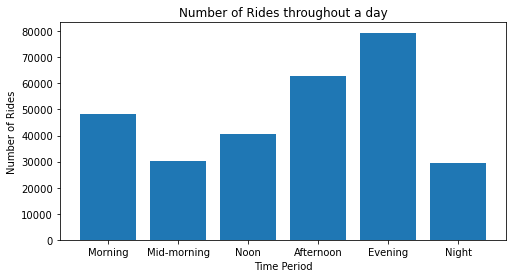

In [121]:
# Graph der die Anzahl der Fahrten an verschiedenen Zeitpunkten eines Tages darstellt 
fig,ax = plt.subplots(figsize=(8,4))

ax.bar(start_hours['Time_Period'],start_hours['Rides'])
ax.set_xlabel("Time Period")
ax.set_ylabel("Number of Rides")
ax.set_title("Number of Rides throughout a day")

plt.show()

# Usage during a day

In [113]:

weekday=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
rides=np.zeros(7)
for i in range(7): 
    rides[i]=la[la["Weekday"]==i].size

In [114]:
weekdaysize = pd.DataFrame({'Weekday':weekday, 'Rides':rides})
weekdaysize

,Weekday,Rides
0,Monday,585634.0
1,Tuesday,633486.0
2,Wednesday,585956.0
3,Thursday,613606.0
4,Friday,636804.0
5,Saturday,500346.0
6,Sunday,508956.0


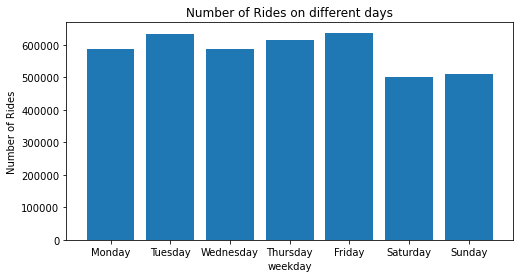

In [120]:
fig,ax = plt.subplots(figsize=(8,4))

ax.bar(weekdaysize["Weekday"], weekdaysize["Rides"])
ax.set_xlabel("weekday")
ax.set_ylabel("Number of Rides")
ax.set_title("Number of Rides on different days")

plt.show()


# Usage during a year

In [117]:
months=["Jan","Feb","Mar","Apr","Mai","Jun","Jul","Aug","Sep","Okt","Nov","Dec"]
rides=np.zeros(12)
for i in range(12): 
    rides[i]=la[la["Month"]==i+1].size
rides

array([272594., 237510., 292908., 262388., 264908., 376334., 399000.,
       459802., 430934., 422506., 336476., 309428.])

In [118]:
year = pd.DataFrame({'Months':months, 'Rides':rides})
year

,Months,Rides
0,Jan,272594.0
1,Feb,237510.0
2,Mar,292908.0
3,Apr,262388.0
4,Mai,264908.0
5,Jun,376334.0
6,Jul,399000.0
7,Aug,459802.0
8,Sep,430934.0
9,Okt,422506.0


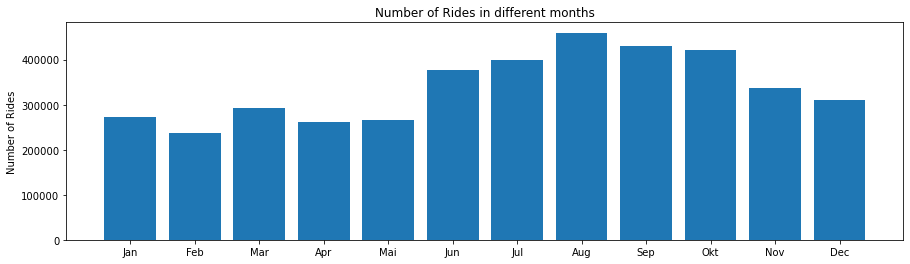

In [119]:
fig,ax = plt.subplots(figsize=(15,4))

ax.bar(year["Months"], year["Rides"])
ax.set_ylabel("Number of Rides")
ax.set_title("Number of Rides in different months")

plt.show()
